Question 1: Discuss the method used for generating random numbers and its impact on the results. Can we generate the same random values multiple times? If so, please add that implementation.

In my python program, I did use the randint() method to generate random numbers. Basically, the randint() method in Python an integer number selected element from the specified range [1]. When we call method multiple times, the method would gives us different random integers. Therefore, we can infer that the values are random for each call and do not overlap in our case. Furthermore, when the number of calls is large and the range is quite smaller, in that case, the random values generated may collide or overlap [2]. Bellowing is function to generate random list and the result of the function which prove above point.

In [2]:
import random

def generate_random_list(n : int):
    random_list=[]
    max_number=2**n
    #generate random number k
    k = random.randrange(1,max_number+1)
    # generate a list with of 2n unique random positive number
    while (len(random_list)<2*n):
        new_number = random.randint(1,max_number+1)
        #print(new_number)
        if new_number not in random_list:
            random_list.append(new_number)
    return k, random_list

In [4]:
k, list_n = generate_random_list(5)
print(k, list_n)

7 [12, 11, 24, 5, 23, 13, 30, 7, 14, 15]


To generate the same random values multiple times, we can use random module's seed() function which is useful in programming contexts where you want the same sequence of random numbers to be generated each time the code is run. When we supply a specific seed to the random generator, you will get the same numbers every time you execute a program [3]. Following is an example code that show will generate the same number every time (you need to pass the same seed value before calling any other random module function) 

In [5]:
import random

# Always produces the same number with seed 30
print('Random number with seed 30')
for i in range(10):
    random.seed(30)
    print(random.randint(25, 50))

Random number with seed 30
42
42
42
42
42
42
42
42
42
42


Another example about seed function shows that with the seed, we can generate 2 same list with random numbers in the list

In [4]:
list1 = []
list2 = []

# Always produces the same number with seed 30
print('Random number with seed 30')
random.seed(30)
for j in range(10):
    list1.append(random.randint(25, 50))

random.seed(30)
for j in range(10):
    list2.append(random.randint(25, 50))

print("list1:", list1)
print("list2:", list2)

Random number with seed 30
list1: [42, 50, 34, 44, 25, 44, 45, 31, 33, 26]
list2: [42, 50, 34, 44, 25, 44, 45, 31, 33, 26]


Question 2: Analyze the average number of trials needed to solve Task 1.a and 1.b. Try to find the optimal solution with the smallest number of steps required. Discuss the complexities involved in the operations.

A straightforward way to solve Tasks 1.a and 1.b is to use a for loop that iterates from the beginning to the end of the list. If we're fortunate and find 'k' at the first index, the loop terminates early. However, if we're not lucky, we must traverse the entire list, resulting in nearly 2n steps. The complexity of this operation is O(2n).

A more efficient solution is to use binary search for finding 'k'. Binary search requires the list to be sorted. Ignoring the sorting step, binary search has a time complexity of O(log(n)), which is significantly better than looping through the entire list. For Task 1.2, with the index of 'k' found in the sorted list, we can create a sublist from the start to index 'k' using Python's list slicing. It's important to note that these time complexities represent average cases and may vary based on factors such as the list size and the specific operation being performed [4]

Question 3: Which problems in Task 1 can be improved using quantum computing? Why? 
In Task 1, I believe that random number generation and searching for number kk in the list can be improved by using quantum computing.

The review article by Ma et al. discusses the generation of true random numbers using quantum physics, which is essential for applications like cryptography. Classical random number generators (RNGs) typically rely on deterministic processes to generate sequences of numbers that appear random. These processes are often based on algorithms that expand a random seed, which is a short sequence of truly random bits. The outputs of classical RNGs, also known as pseudo-random number generators, can be reproduced if the initial seed and the algorithm are known. While these numbers are sufficient for many applications, such as simulations and non-cryptographic randomness, they are not truly random because they are deterministic and can exhibit patterns or correlations over long sequences. Quantum random number generators (QRNGs), on the other hand, harness the inherent randomness of quantum mechanical processes to generate truly random numbers. These processes, such as the measurement of a quantum state or the detection of single photons, are fundamentally probabilistic and cannot be predicted with certainty, even in principle. This means that QRNGs can provide a higher level of randomness assurance, which is particularly important for applications like cryptography where the unpredictability of the random numbers is critical. [5]

For the problem of searching for number kk in the list, Grover's algorithm offers a significant improvement. Grover's algorithm is a quantum algorithm for unstructured search problems that provides a quadratic speedup over classical algorithms. Specifically, Grover's algorithm requires a number of operations proportional to the square root of the number of items in the list, whereas classical algorithms require a number of operations proportional to the total number of items. This means that Grover's algorithm can perform the search with far fewer operations, making it much more efficient for large datasets. Grover's algorithm, along with its extensions and underlying methodology, is broadly applicable and offers a quadratic advantage for many computational tasks that may not initially appear to be unstructured search problems. This makes quantum computing a powerful tool for improving the efficiency of search algorithms. [6]



Bonus 1 (recommended): Propose a quantum solution for Task 1 and implement a quantum program using any quantum SDKs (such as Qiskit, Cirq, or Braket) to solve any parts of Task 1.

Qubit Random Number Generator

Step 1: Creating circuit for n bits

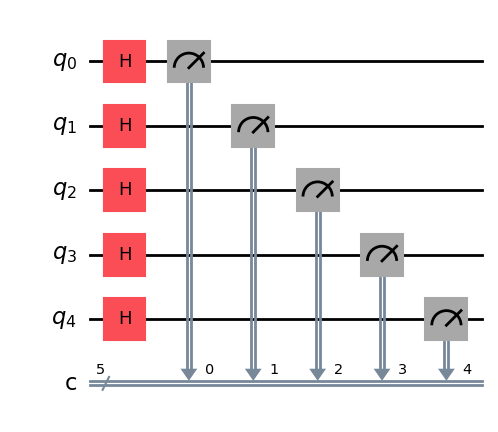

In [5]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService

# Define n
n = 5
# Create a 4-qubit quantum circuit
q = QuantumRegister(n,'q')
c = ClassicalRegister(n,'c')
circuit = QuantumCircuit(q,c)
circuit.h(q)
circuit.measure(q,c)
circuit.draw(output='mpl')

Step 2: Execute on backend simulator

In [6]:
from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()
result = backend.run(circuit, shots= 2*n).result()

In [7]:
counts = result.get_counts(circuit)
print("Random number counts:")
print(counts)
random_numbers = []
for outcome, count in counts.items():
    number = int(outcome, 2)
    random_numbers.extend([number] * count)

print("List of Random Numbers:", random_numbers)

Random number counts:
{'11100': 1, '10111': 1, '11000': 2, '11011': 1, '11110': 1, '11010': 1, '00010': 1, '00001': 1, '00100': 1}
List of Random Numbers: [28, 23, 24, 24, 27, 30, 26, 2, 1, 4]


Bonus 2: Propose a simple deployment approach for this task by packaging your program in a Docker container and publishing these implementations as API services using any API frameworks (such as Flask and FastAPI). Implement your proposal if possible.

I used React and FastAPI to build a simple web page that allows users to input a value for 'n'. The web page sends a GET request to the FastAPI backend, which processes the request and returns the result in JSON format. This result is then displayed on the web page

I then write 2 Dockerfile to create FastAPI (backend server) and React (frontend) in following location
- FastAPI: ./FastAPI
- React: ./React/qac_frontend

I then write a docker-compose file to automally run the containers from 2 images when running:
docker-compose up

After running docker-compose up on your terminal. Go to localhost:3000 to try the function. Following is the picture about web page

![title](images/pic1.png)

Reference 

https://www.w3schools.com/python/ref_random_randint.asp [1]

https://www.digitalocean.com/community/tutorials/randint-method-in-python [2]

https://pynative.com/python-random-seed/ [3]

https://medium.com/@ivanmarkeyev/understanding-python-list-operations-a-big-o-complexity-guide-49be9c00afb4 [4]

Ma, Xiongfeng, et al. "Quantum random number generation." npj Quantum Information 2.1 (2016): 1-9. [5]

https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/grovers-algorithm [6]